In [1]:
# Importazione pacchetti
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# Ising model (Main code)
def ising(L):

    mt=[] # Vettore delle magnetizzazioni medie.
    tt=[] # Vettore dei tempi.

    t0=0

    m=np.random.choice([-1, 1], size=(L,L), p=[0.5, 0.5])
    for time in range(int(t)):

        t0+=1
        for x in range(L):
            for y in range(L):

                somma=0
                s0=m[x][y]
                somma=m[x][(y-1)%L]+m[x][(y+1)%L]+m[(x+1)%L][y]+m[(x-1)%L][y]
                de=2*s0*(somma+h)/T
                if de<0:
                    m[x][y]= (-1)*s0
                else:
                    flip=random.random()
                    if flip<(np.exp(-1*de)):
                        m[x][y]= (-1)*s0    

        mt.append(np.sum(m)/(L**2))
        tt.append(t0)
    return mt,tt

In [3]:
# Domain function
def Toti(mt):
    transiente=1000 # scarto un transiente iniziale
    DomPos=[] # Vettore delle posizioni (temporali) dei domain change
    mnm=np.mean(np.abs(mt))
    stdm=np.std(np.abs(mt))
    domini=0
    mag=mt[transiente]/np.abs(transiente)
    up=np.abs(mnm)-np.abs(stdm) # metto i bound ad una std dalla media
    down=-np.abs(mnm)+np.abs(stdm)
    kk=t-transiente
    k0=-1
    for k in range(kk):
        k0+=1
        if mag<0:
            if mt[transiente+k0]>down:
                if mt[transiente+k0]>up:
                    mag*=-1
                    domini+=1
                    DomPos.append(k0)
        if mag>0:
            if mt[transiente+k0]<up:
                if mt[transiente+k0]<down:
                    mag*=-1
                    domini+=1
                    DomPos.append(k0)
    DomPos=np.array(DomPos)
    DomPos+=transiente
    return domini,DomPos

In [4]:
# Variables
T=2.26 # Critical temperature.
t=5000
h=0 # External magnetic field.

In [5]:
# Running code
L=[6,8,10,12,14]
Dom=[] # Domain vector.
for j in L:
    mt,tx=ising(int(j))
    domain,pos=Toti(mt)
    Dom.append(domain)

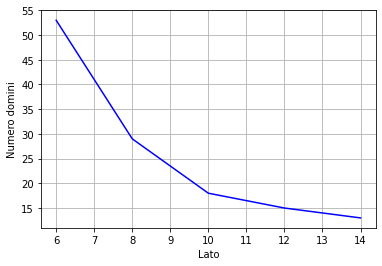

Domini: [53, 29, 18, 15, 13]


In [6]:
# Ambiente grafico 'numero di domini vs lato del box'
plt.plot(L,Dom,'b')
plt.xlabel("Lato")
plt.ylabel("Numero domini")
plt.grid()
plt.show()
print(f'Domini: {Dom}')

In [7]:
# Te ne metto uno di prova con un lato alto così si vede un po' meglio.
mt,tx=ising(12)
num,pos=Toti(mt)

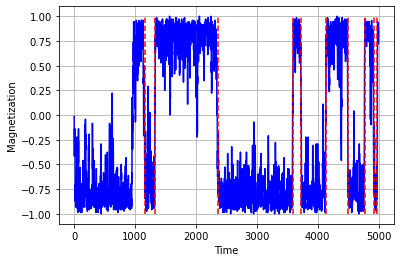

In [8]:
# Ambiente grafico con i domini separati da righe tratteggiate.
y=np.linspace(-1,1,30)
plt.plot(tx,mt,'b')
for i in range(len(pos)):
    x=pos[i]+np.linspace(-1,1,30)*0
    plt.plot(x,y,'--r')
plt.grid()
plt.xlabel("Time")
plt.ylabel("Magnetization")
plt.show()

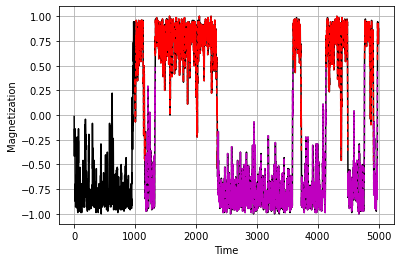

In [9]:
# Ambiente grafico con i domini di colori diversi.
plt.plot(tx,mt,'black')
color=1

x=range(tx[1000],pos[0],1)
y=[]
for j in range(len(x)):
    y.append(mt[x[j]])
if color>0:
    plt.plot(x,y,'--r')
    color=-1

else:
    plt.plot(x,y,'--m')
    color=1


for i in range(len(pos)-1):
    
    x=range(pos[i],pos[i+1],1)
    x=np.array(x)
    y=[]
    for j in range(len(x)):
        y.append(mt[x[j]])
    if color>0:
        plt.plot(x,y,'--r')
        color=-1
        
    else:
        plt.plot(x,y,'--m')
        color=1

x=range(pos[len(pos)-1],tx[len(tx)-1],1)
y=[]
for j in range(len(x)):
    y.append(mt[x[j]])
if color>0:
    plt.plot(x,y,'--r')
    color=-1

else:
    plt.plot(x,y,'--m')
    color=1

plt.grid()
plt.xlabel("Time")
plt.ylabel("Magnetization")
plt.show()

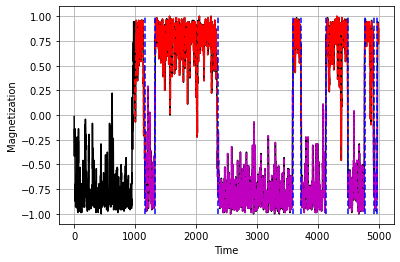

In [10]:
# Ambiente grafico con i domini di colori diversi e con anche le linee tratteggiate a dividere i domini.
plt.plot(tx,mt,'black')
color=1

x=range(tx[1000],pos[0],1)
y=[]
for j in range(len(x)):
    y.append(mt[x[j]])
if color>0:
    plt.plot(x,y,'--r')
    color=-1

else:
    plt.plot(x,y,'--m')
    color=1


for i in range(len(pos)-1):
    
    x=range(pos[i],pos[i+1],1)
    x=np.array(x)
    y=[]
    for j in range(len(x)):
        y.append(mt[x[j]])
    if color>0:
        plt.plot(x,y,'--r')
        color=-1
        
    else:
        plt.plot(x,y,'--m')
        color=1

x=range(pos[len(pos)-1],tx[len(tx)-1],1)
y=[]
for j in range(len(x)):
    y.append(mt[x[j]])
if color>0:
    plt.plot(x,y,'--r')
    color=-1

else:
    plt.plot(x,y,'--m')
    color=1

y=np.linspace(-1,1,30)
for i in range(len(pos)):
    x=pos[i]+np.linspace(-1,1,30)*0
    plt.plot(x,y,'--b')
    
plt.grid()
plt.xlabel("Time")
plt.ylabel("Magnetization")
plt.show()